In [6]:
import yfinance as yf
import pandas as pd
import numpy as np


long_MA = 50
short_MA = 20
buy_price = 0
sell_price = 0
position_open = False
profit = 0

aapl = yf.Ticker("AAPL")
data = aapl.history(period="max", interval="1d")
data['Long Moving Average'] = data['Close'].rolling(long_MA).mean()
data['Short Moving Average'] = data['Close'].rolling(short_MA).mean()

data.dropna(inplace=True)
print(data)

for count in range(len(data)):
    if data['Long Moving Average'][count] > data['Short Moving Average'][count] and position_open == True:
        sell_price = data['Close'][count]
        profit += sell_price - buy_price
        position_open = False
    elif data['Short Moving Average'][count] > data['Long Moving Average'][count] and position_open == False:
        buy_price = data['Close'][count]
        position_open = True


if position_open:
    sell_price = data['Close'][count]
    profit += sell_price - buy_price
    position_open = False


print("Total Profit: ", profit)

                                 Open        High         Low       Close   
Date                                                                        
1981-02-24 00:00:00-05:00    0.083246    0.083246    0.082379    0.082379  \
1981-02-25 00:00:00-05:00    0.087582    0.088015    0.087582    0.087582   
1981-02-26 00:00:00-05:00    0.088882    0.089316    0.088882    0.088882   
1981-02-27 00:00:00-05:00    0.091918    0.092785    0.091918    0.091918   
1981-03-02 00:00:00-05:00    0.092351    0.092785    0.092351    0.092351   
...                               ...         ...         ...         ...   
2023-04-17 00:00:00-04:00  165.089996  165.389999  164.029999  165.229996   
2023-04-18 00:00:00-04:00  166.100006  167.410004  165.649994  166.470001   
2023-04-19 00:00:00-04:00  165.800003  168.160004  165.539993  167.630005   
2023-04-20 00:00:00-04:00  166.089996  167.869995  165.559998  166.649994   
2023-04-21 00:00:00-04:00  165.050003  166.449997  164.490005  165.020004   

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np



# Bollinger Bands




aapl = yf.Ticker("AAPL").history(period="max", interval="1d")
print("Start")
aapl['20 MA'] = aapl['Close'].rolling(20).mean()
rate = aapl['Close'].rolling(20).std()
aapl['Upper Band'] = aapl['20 MA'] + (2 * rate)
aapl['Lower Band'] = aapl['20 MA'] - (2 * rate)

aapl.dropna(inplace=True)

#aapl.plot.line(y=["Close", "Upper Band", "Lower Band", "20 MA"], figsize=(30,23))






import mplfinance as mplf


ap = mplf.make_addplot(aapl['20 MA'])
ap2 = mplf.make_addplot(aapl['Lower Band'])
ap3 = mplf.make_addplot(aapl['Upper Band'])


#mplf.plot(aapl, type="candle", addplot=[ap, ap2, ap3], figsize=(30,22))





# Test Strategy
wins = 0
losses = 0
trade_count = 0
entry_price = 0
exit_price = 0
trade_profit = 0
total_profit = 0
position_open = False



# Longs Only


for count in range(len(aapl) - 1):
    if position_open == False and aapl['Close'][count-1] < aapl['Lower Band'][count-1] and aapl['Close'][count] > aapl['Lower Band'][count]:
        print()
        print("Hit Lower Band")
        position_open = True
        entry_price = aapl['Open'][count+1]
        trade_count += 1

    elif position_open == True and aapl['Close'][count-1] > aapl['Upper Band'][count-1] and aapl['Close'][count] < aapl['Upper Band'][count]:
        print("Hit Upper Band")
        position_open = False
        exit_price = aapl['Open'][count+1]
        print("Trade Profit:", exit_price - entry_price)
        trade_profit = exit_price - entry_price
        total_profit += trade_profit
        if trade_profit > 0: wins += 1
        else: losses += 1
        print()

if position_open == True:
    print("Closing Last Trade")
    position_open = False
    exit_price = aapl['Open'][count+1]
    print("Trade Profit:", exit_price - entry_price)
    trade_profit = exit_price - entry_price
    if trade_profit > 0: wins += 1
    else: losses += 1
    print()
    

print("Longs Only Total Profit:", total_profit)
print("Winning %:", (wins / (wins + losses)) * 100)


# Shorts Only

wins = 0
losses = 0
trade_profit = 0
total_profit = 0

for count in range(len(aapl) - 1):
    if position_open == False and aapl['Close'][count-1] > aapl['Upper Band'][count-1] and aapl['Close'][count] < aapl['Upper Band'][count]:
        print()
        print("Hit Upper Band")
        position_open = True
        entry_price = aapl['Open'][count+1]
        trade_count += 1

    elif position_open == True and aapl['Close'][count-1] < aapl['Lower Band'][count-1] and aapl['Close'][count] > aapl['Lower Band'][count]:
        print("Hit Lower Band")
        position_open = False
        exit_price = aapl['Open'][count+1]
        print("Trade Profit:", entry_price - exit_price)
        trade_profit = entry_price - exit_price
        total_profit += trade_profit
        if trade_profit > 0: wins += 1
        else: losses += 1
        print()


if position_open == True:
    print("Closing Last Trade")
    position_open = False
    exit_price = aapl['Open'][count+1]
    print("Trade Profit:", entry_price - exit_price)
    trade_profit = entry_price - exit_price
    if trade_profit > 0: wins += 1
    else: losses += 1
    print()


print(trade_count)


print("Shorts Only Total Profit:", total_profit)
print("Winning %:", (wins / (wins + losses)) * 100)

Start

Hit Lower Band
Hit Upper Band
Trade Profit: 0.015608400106430054


Hit Lower Band
Hit Upper Band
Trade Profit: -0.025147152038889245


Hit Lower Band
Hit Upper Band
Trade Profit: 0.006070390090008329


Hit Lower Band
Hit Upper Band
Trade Profit: 0.024713586375653407


Hit Lower Band
Hit Upper Band
Trade Profit: -0.06070014776076149


Hit Lower Band
Hit Upper Band
Trade Profit: -0.0030348436880859586


Hit Lower Band
Hit Upper Band
Trade Profit: 0.013007118300134415


Hit Lower Band
Hit Upper Band
Trade Profit: 0.007370247719075823


Hit Lower Band
Hit Upper Band
Trade Profit: 0.0073710657860100726


Hit Lower Band
Hit Upper Band
Trade Profit: -0.04205620329109662


Hit Lower Band
Hit Upper Band
Trade Profit: 0.0039019492597085204


Hit Lower Band
Hit Upper Band
Trade Profit: 0.009972354106807635


Hit Lower Band
Hit Upper Band
Trade Profit: 0.023412945831105147


Hit Lower Band
Hit Upper Band
Trade Profit: 0.0364756186464088


Hit Lower Band
Hit Upper Band
Trade Profit: 0.025584

In [ ]:
import pandas as pd
import numpy as np

# RSI Overbought/Oversold Strategy

buy_price = 0
sell_price = 0
position_open = False
overbought_level = 80
oversold_level = 20



c:\Users\mosel\AppData\Local\Programs\Python\Python311\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


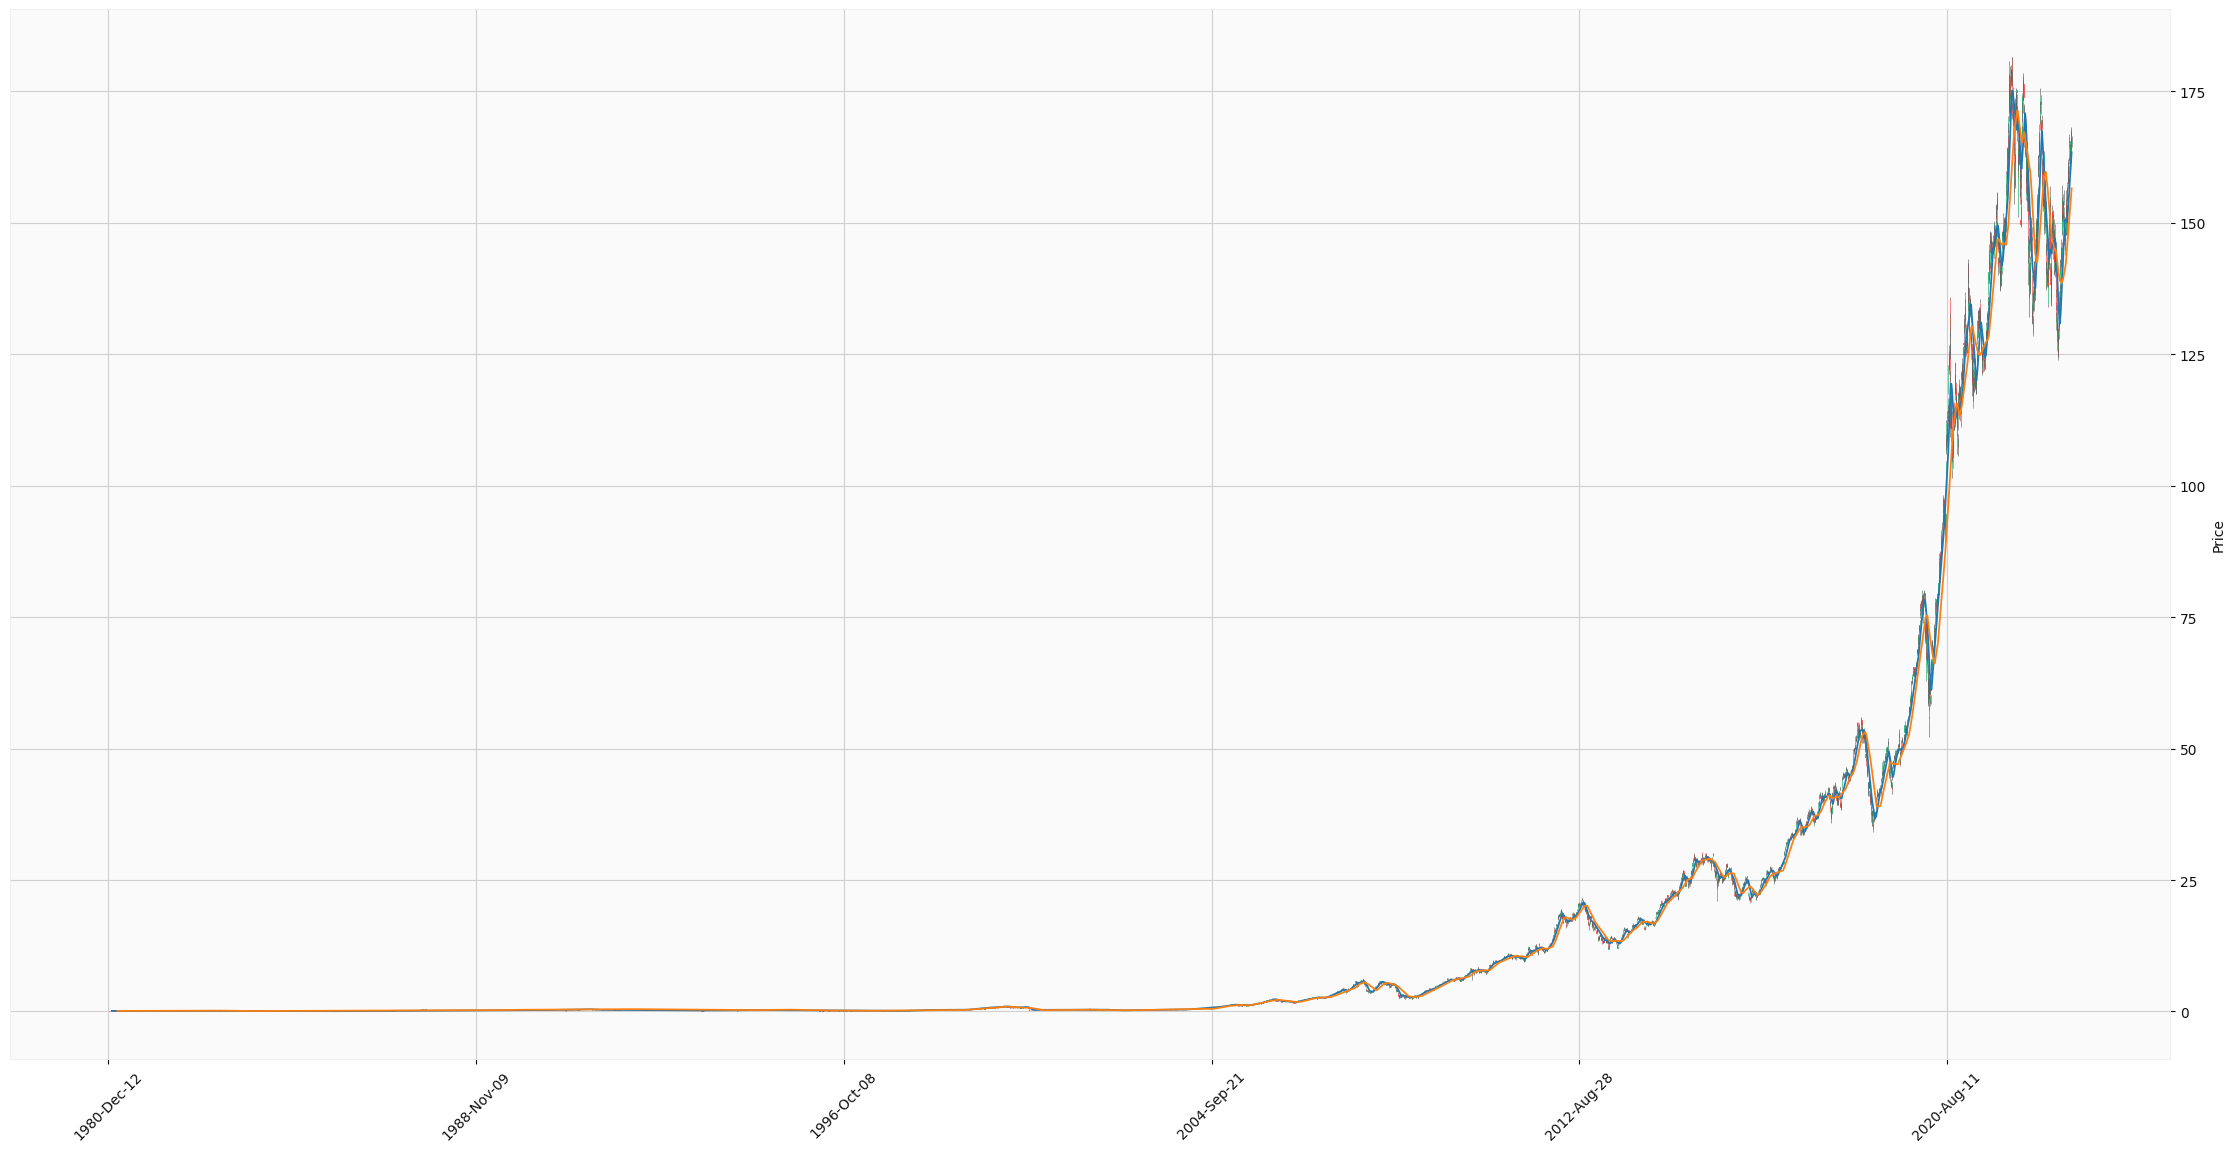

In [9]:
import mplfinance as mplf
import yfinance as yf
import pandas as pd
import numpy as np

aapl = yf.Ticker("AAPL").history(period="max", interval="1d")
aapl['20 MA'] = aapl['Close'].rolling(20).mean()
aapl['50 MA'] = aapl['Close'].rolling(50).mean()

ap = mplf.make_addplot(aapl['20 MA'])
ap2 = mplf.make_addplot(aapl['50 MA'])

mplf.plot(aapl, addplot=[ap, ap2], style="yahoo", type="candle", figsize=(30, 15))

In [1]:
import pandas as pd


print(pd.DataFrame([[]]))

Empty DataFrame
Columns: []
Index: [0]
